In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\data.csv')
print (df.head())
df = df.drop(columns=[col for col in df.columns if "id" in col.lower() or "Unnamed" in col])

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chauh\AppData\Local\Temp\ipykernel_14908\1999664005.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\data.csv')


In [6]:
print (df.head())


  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [9]:
# Encode target variable (assuming 'diagnosis' is the target)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M=1, B=0

# Select two features for visualization (you can change them)
features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# decesion boundry plot function
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()


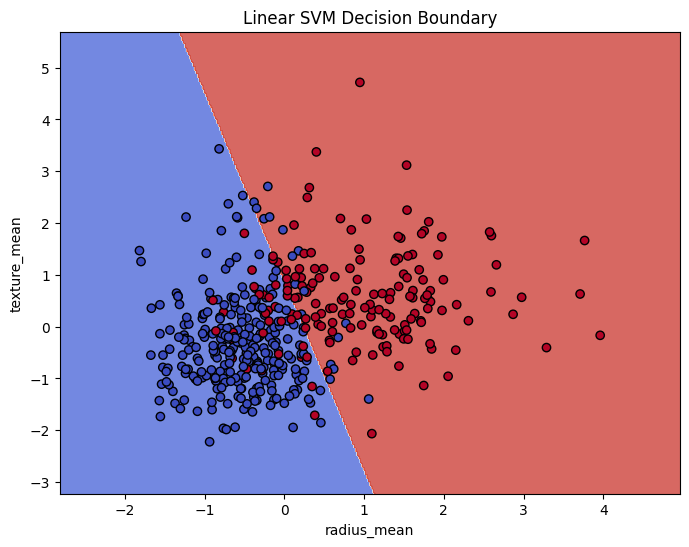

In [13]:
#Linear svm 
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train_scaled, y_train)

plot_decision_boundary(linear_svm, X_train_scaled, y_train, "Linear SVM Decision Boundary")


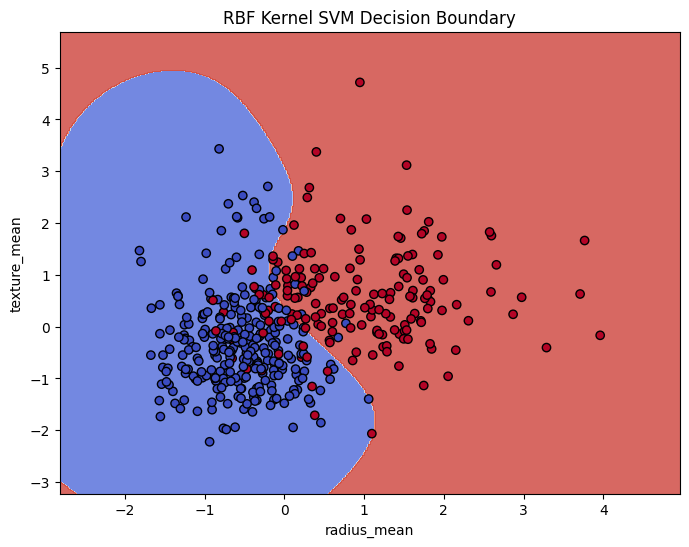

In [15]:
#rbf kernal svm
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train_scaled, y_train)

plot_decision_boundary(rbf_svm, X_train_scaled, y_train, "RBF Kernel SVM Decision Boundary")


In [16]:
#hyperparameter tuning using gridsearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.1}


In [17]:
#test data evaluation
y_pred = grid.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[66  5]
 [ 5 38]]


In [18]:
#cross validation
scores = cross_val_score(grid.best_estimator_, X_train_scaled, y_train, cv=5)
print("Cross-validation Accuracy: {:.2f} ± {:.2f}".format(scores.mean(), scores.std()))


Cross-validation Accuracy: 0.90 ± 0.03
